# Ensemble Techniques Assignment 4

Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
## importing necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
num_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [9]:
num_pipe=Pipeline(
    steps= [('imputer',SimpleImputer(strategy='median')),
             ('scaler',StandardScaler())
    
])

In [10]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([('numerical_columns',num_pipe,num_cols)])

In [11]:
X = df.drop('target',axis=1)
y = df.target

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.30)

In [13]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,max_depth=10)

In [15]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
print('accuracy_score: ', accuracy_score(y_test, y_pred)),
print('precision_score: ', precision_score(y_test, y_pred)),
print('recall_score: ', recall_score(y_test, y_pred)), 
print('f1_score: ', f1_score(y_test, y_pred))

accuracy_score:  0.8131868131868132
precision_score:  0.8235294117647058
recall_score:  0.84
f1_score:  0.8316831683168315


In [19]:
import matplotlib.pyplot as plt

In [20]:
importances=classifier.feature_importances_

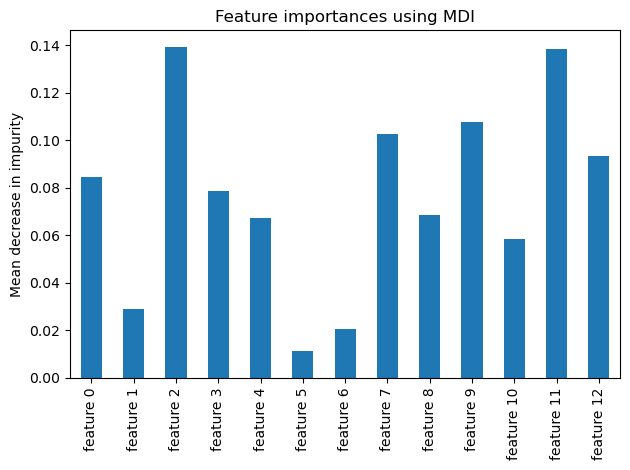

In [21]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
classifier_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
classifier_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [22]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],        
    'max_depth': [None, 10, 20, 30],             
    'min_samples_split': [2, 5, 10, 20],        
    'min_samples_leaf': [1, 2, 4, 8]
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
model_cv = RandomizedSearchCV(classifier,param_grid,cv=4)

In [24]:
model_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(max_depth=10),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 150, 200]})

In [25]:
y_pred_cv=model_cv.predict(X_test)

In [26]:
print('accuracy_score: ', accuracy_score(y_test, y_pred_cv)),
print('precision_score: ', precision_score(y_test, y_pred_cv)),
print('recall_score: ', recall_score(y_test, y_pred_cv)), 
print('f1_score: ', f1_score(y_test, y_pred_cv))

accuracy_score:  0.8241758241758241
precision_score:  0.8269230769230769
recall_score:  0.86
f1_score:  0.8431372549019608


In [27]:
model_cv.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_depth': 20}

|Performance |Model| Performace of tuned model|
|------------|---------|--------------------|
|accuracy_score| 0.8351648351648352 | 0.8241758241758241|
|precision_score|  0.8301886792452831| 0.8269230769230769|
|recall_score | 0.88 |  0.86|
|f1_score |  0.8543689320388349|  0.8431372549019608|

# The End